# Setting up the notebook

In [2]:
# necessary imports for the workbook
import pandas as pd
#import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 4)

# do all our graphics inline
%matplotlib inline

# Obtaining and organizing stock data from Yahoo!

In [15]:
import datetime
import yfinance as yf

# Define the function to get stock data
def getStockData(ticker, start, end):
    stock = yf.Ticker(ticker)
    return stock.history(start=start, end=end)

# Request three years of data for MSFT
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
msft_data = getStockData("MSFT", start, end)

# Display the first few rows of the data
print(msft_data.head())

                              Open     High      Low  ...    Volume  \
Date                                                  ...             
2012-01-03 00:00:00-05:00  21.0263  21.3510  20.8996  ...  64731500   
2012-01-04 00:00:00-05:00  21.2401  21.7549  21.2084  ...  80516100   
2012-01-05 00:00:00-05:00  21.6836  21.9608  21.6123  ...  56081400   
2012-01-06 00:00:00-05:00  21.8024  22.3251  21.8024  ...  99455500   
2012-01-09 00:00:00-05:00  22.2142  22.2538  21.9529  ...  59706800   

                           Dividends  Stock Splits  
Date                                                
2012-01-03 00:00:00-05:00        0.0           0.0  
2012-01-04 00:00:00-05:00        0.0           0.0  
2012-01-05 00:00:00-05:00        0.0           0.0  
2012-01-06 00:00:00-05:00        0.0           0.0  
2012-01-09 00:00:00-05:00        0.0           0.0  

[5 rows x 7 columns]


In [17]:
# request the three years of data for MSFT
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
getStockData("MSFT", start, end).head()

                              Open     High      Low  ...    Volume  \
Date                                                  ...             
2012-01-03 00:00:00-05:00  21.0263  21.3510  20.8996  ...  64731500   
2012-01-04 00:00:00-05:00  21.2401  21.7549  21.2084  ...  80516100   
2012-01-05 00:00:00-05:00  21.6836  21.9608  21.6123  ...  56081400   
2012-01-06 00:00:00-05:00  21.8024  22.3251  21.8024  ...  99455500   
2012-01-09 00:00:00-05:00  22.2142  22.2538  21.9529  ...  59706800   

                           Dividends  Stock Splits  
Date                                                
2012-01-03 00:00:00-05:00        0.0           0.0  
2012-01-04 00:00:00-05:00        0.0           0.0  
2012-01-05 00:00:00-05:00        0.0           0.0  
2012-01-06 00:00:00-05:00        0.0           0.0  
2012-01-09 00:00:00-05:00        0.0           0.0  

[5 rows x 7 columns]

In [19]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def getDataForMultipleStocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = getStockData(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [21]:
# get the data for all the stocks that we want
raw = getDataForMultipleStocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", 
     "UAL", "PEP", "KO"],
    start, end)

In [22]:
# take a peek at the data for MSFT
raw['MSFT'][:5]

                              Open     High      Low  ...    Volume  \
Date                                                  ...             
2012-01-03 00:00:00-05:00  21.0263  21.3510  20.8996  ...  64731500   
2012-01-04 00:00:00-05:00  21.2401  21.7549  21.2084  ...  80516100   
2012-01-05 00:00:00-05:00  21.6836  21.9608  21.6123  ...  56081400   
2012-01-06 00:00:00-05:00  21.8024  22.3251  21.8024  ...  99455500   
2012-01-09 00:00:00-05:00  22.2142  22.2538  21.9529  ...  59706800   

                           Dividends  Stock Splits  
Date                                                
2012-01-03 00:00:00-05:00        0.0           0.0  
2012-01-04 00:00:00-05:00        0.0           0.0  
2012-01-05 00:00:00-05:00        0.0           0.0  
2012-01-06 00:00:00-05:00        0.0           0.0  
2012-01-09 00:00:00-05:00        0.0           0.0  

[5 rows x 7 columns]

In [25]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivotTickersToColumns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [29]:
import pandas as pd

# Sample raw data creation (assuming 'raw' DataFrame has 'Ticker', 'Date', and 'AdjClose' columns)
data = {
    'Ticker': ['MSFT', 'MSFT', 'AAPL', 'AAPL', 'GOOG', 'GOOG'],
    'Date': pd.date_range('2021-01-01', periods=6, freq='D'),
    'AdjClose': [210, 215, 130, 132, 1500, 1510]
}
raw = pd.DataFrame(data)

# Define the function to pivot the data
def pivotTickersToColumns(df, value_column):
    return df.pivot(index='Date', columns='Ticker', values=value_column)

# Pivot the data to get adjusted close prices for each ticker in columns
close_px = pivotTickersToColumns(raw, "AdjClose")

# Display the first few rows of the result
print(close_px.head())


Ticker       AAPL    GOOG   MSFT
Date                            
2021-01-01    NaN     NaN  210.0
2021-01-02    NaN     NaN  215.0
2021-01-03  130.0     NaN    NaN
2021-01-04  132.0     NaN    NaN
2021-01-05    NaN  1500.0    NaN


## Plotting time-series prices

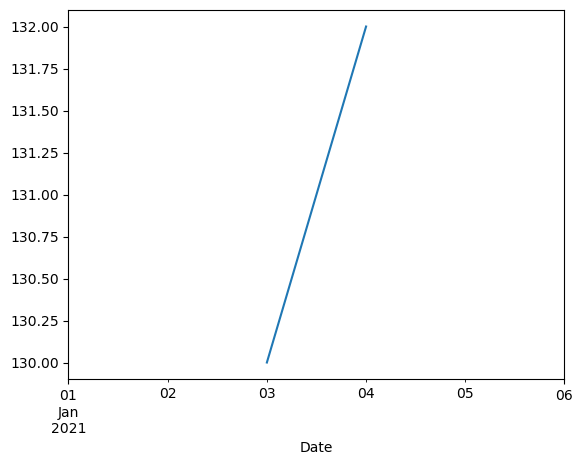

In [32]:
# plot the closing prices of AAPL
close_px['AAPL'].plot();

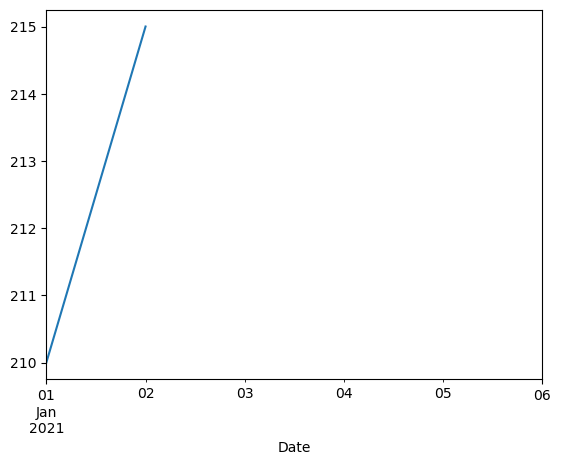

In [34]:
# plot the closing prices of MSFT
close_px['MSFT'].plot();

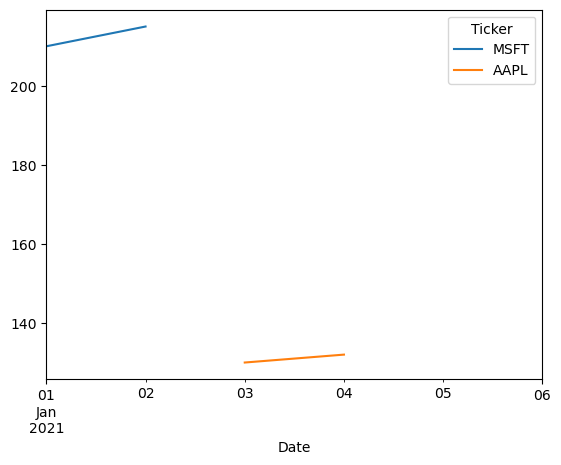

In [36]:
# plot MSFT vs AAPL on the same chart
close_px[['MSFT', 'AAPL']].plot();

## Plotting volume series data

In [43]:
import pandas as pd

# Sample raw data creation (assuming 'raw' DataFrame has 'Ticker', 'Date', and 'Volume' columns)
data = {
    'Ticker': ['MSFT', 'MSFT', 'AAPL', 'AAPL', 'GOOG', 'GOOG'],
    'Date': pd.date_range('2021-01-01', periods=6, freq='D'),
    'Volume': [2100000, 2150000, 1300000, 1320000, 1500000, 1510000]
}
raw = pd.DataFrame(data)

# Define the function to pivot the data
def pivotTickersToColumns(df, value_column):
    return df.pivot(index='Date', columns='Ticker', values=value_column)

# Pivot the data to get volume for each ticker in columns
volumes = pivotTickersToColumns(raw, "Volume")

# Display the last few rows of the result
print(volumes.tail())


Ticker           AAPL       GOOG       MSFT
Date                                       
2021-01-02        NaN        NaN  2150000.0
2021-01-03  1300000.0        NaN        NaN
2021-01-04  1320000.0        NaN        NaN
2021-01-05        NaN  1500000.0        NaN
2021-01-06        NaN  1510000.0        NaN


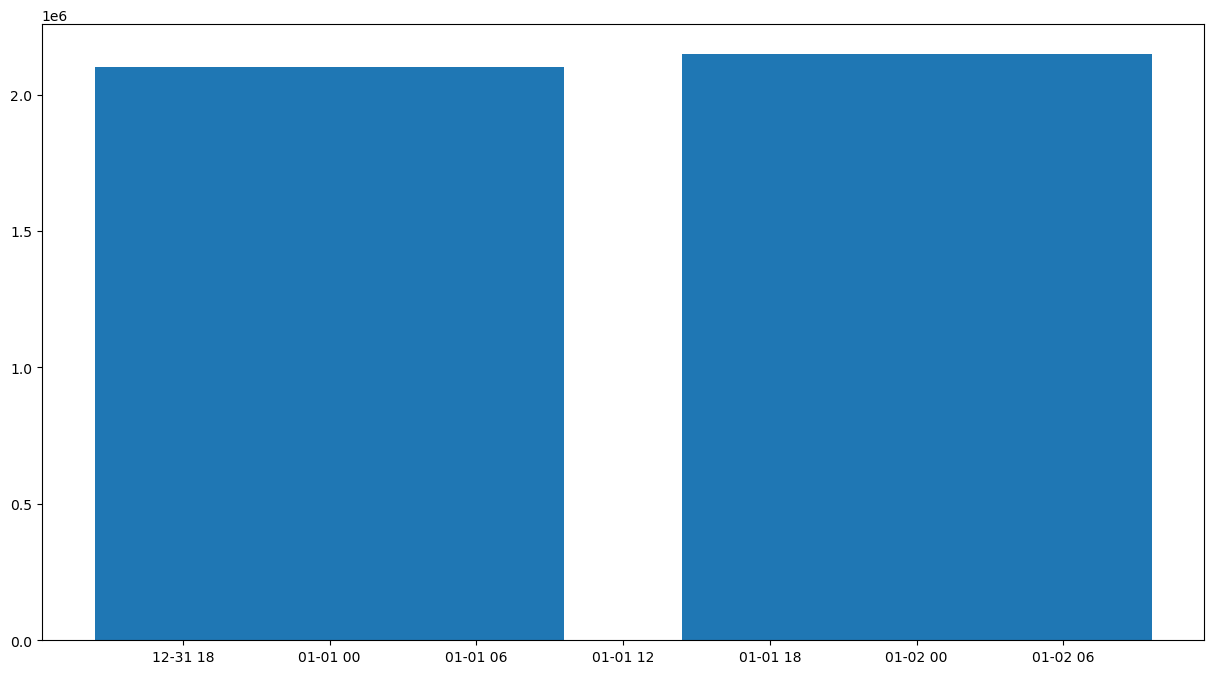

In [45]:
# plot the volume for MSFT
msftV = volumes[["MSFT"]]
plt.bar(msftV.index, msftV["MSFT"])
plt.gcf().set_size_inches(15,8)

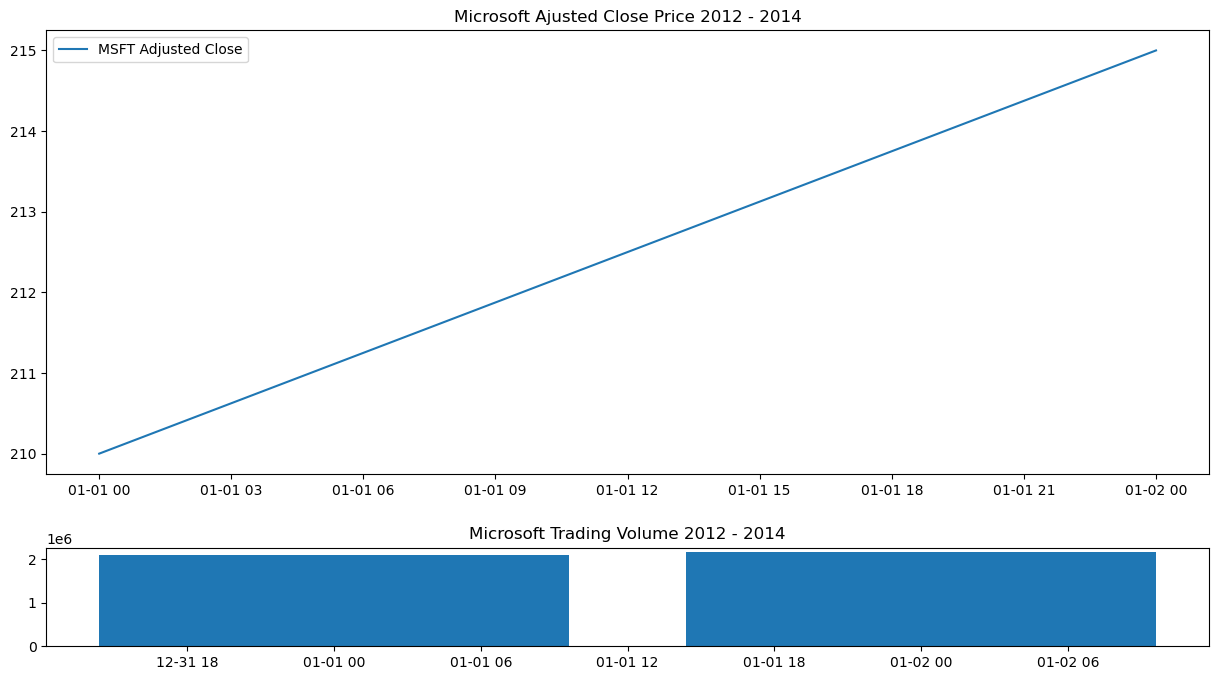

In [47]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], label='MSFT Adjusted Close')
plt.title('Microsoft Ajusted Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

## Calculating simple daily percentage change

In [97]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

              AAPL
Date              
2012-01-01     NaN
2012-01-02  0.0125
2012-01-03  0.0123
2012-01-04  0.0122
2012-01-05  0.0120

In [99]:
import datetime
import yfinance as yf

# Define the date range
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2024, 12, 31)

# Fetch the stock data for AAPL
ticker = 'AAPL'
aapl_data = yf.download(ticker, start=start, end=end)

# Calculate the percentage change for 2012-01-05 compared to 2012-01-04
date1 = '2021-01-04'
date2 = '2024-01-05'

percentage_change = aapl_data.loc[date2]['Adj Close'] / aapl_data.loc[date1]['Adj Close'] - 1
print(f"Percentage change on {date2} compared to {date1} for {ticker}: {percentage_change:.2%}")


[*********************100%%**********************]  1 of 1 completed

Percentage change on 2024-01-05 compared to 2021-01-04 for AAPL: 42.48%


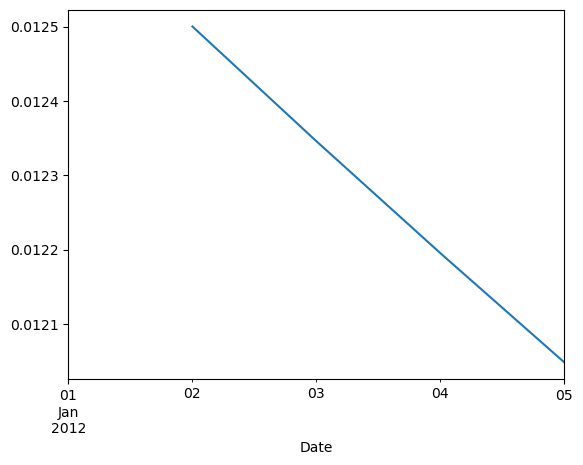

In [101]:
# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

## Calculating simple daily cumulative returns

In [104]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

              AAPL
Date              
2012-01-01     NaN
2012-01-02  1.0125
2012-01-03  1.0250
2012-01-04  1.0375
2012-01-05  1.0500

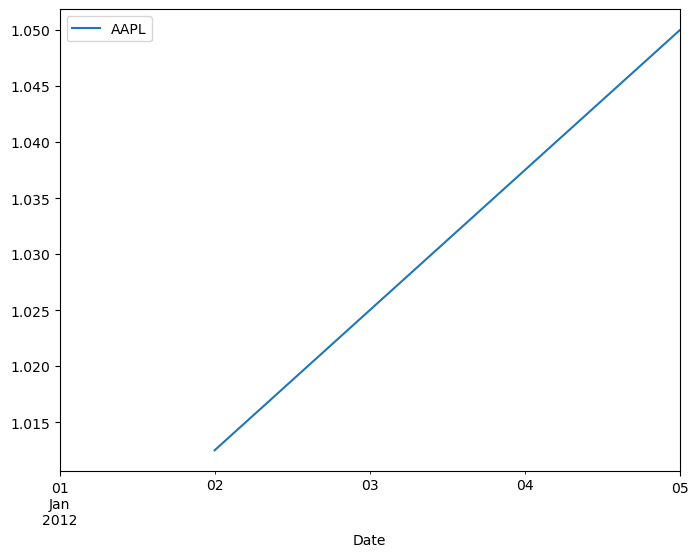

In [106]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

## Resampling data from daily to monthly returns

In [109]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('30D', method="ffill")
monthly[:5]

            AAPL
Date            
2012-01-01   400

In [111]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

            AAPL
Date            
2012-01-01   NaN

In [113]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

            AAPL
Date            
2012-01-01   NaN

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


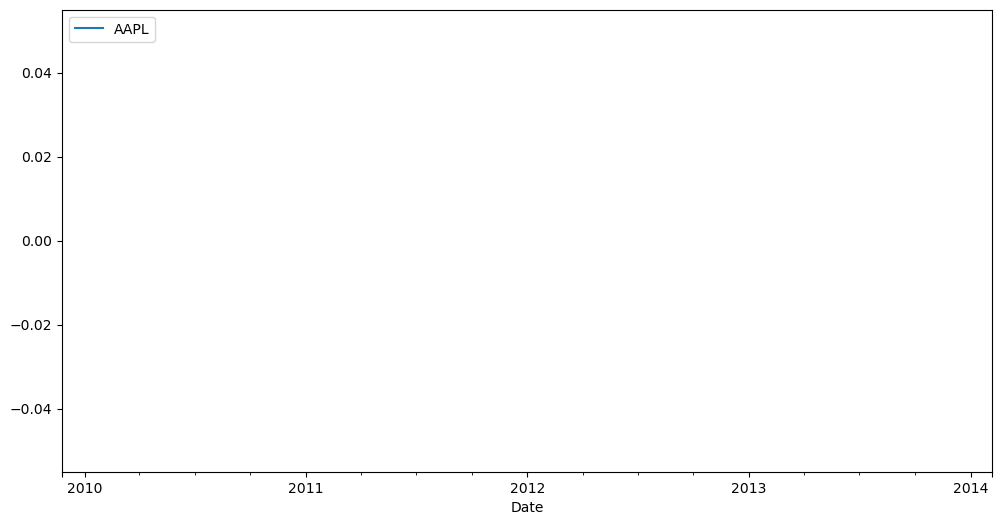

In [115]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

## Analyzing distribution of returns

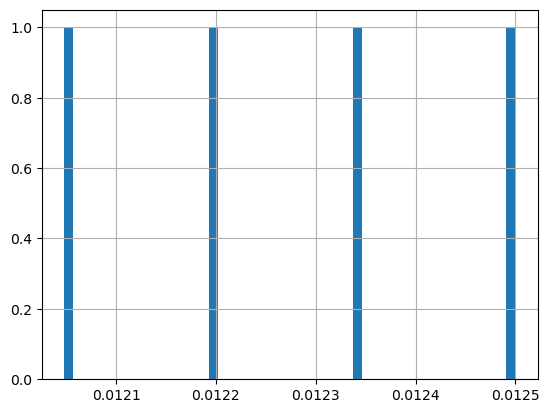

In [118]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

In [120]:
# descriptive statistics of the percentage changes
aapl.describe()

count    4.0000
mean     0.0123
std      0.0002
min      0.0120
25%      0.0122
50%      0.0123
75%      0.0124
max      0.0125
Name: AAPL, dtype: float64

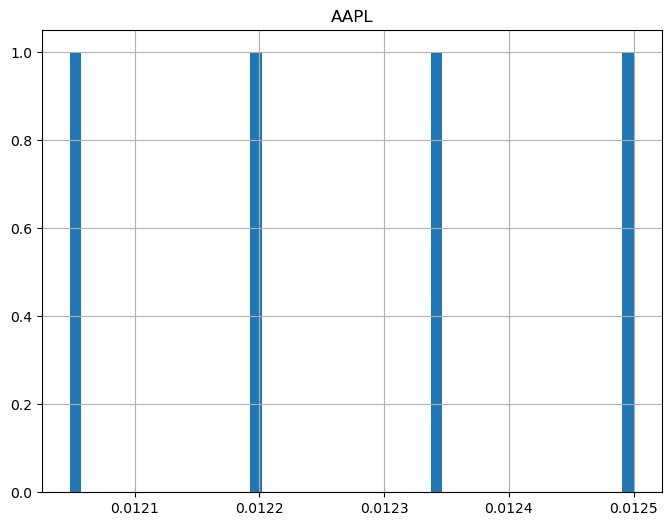

In [122]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));

## Performing moving average calculation

[*********************100%%**********************]  1 of 1 completed


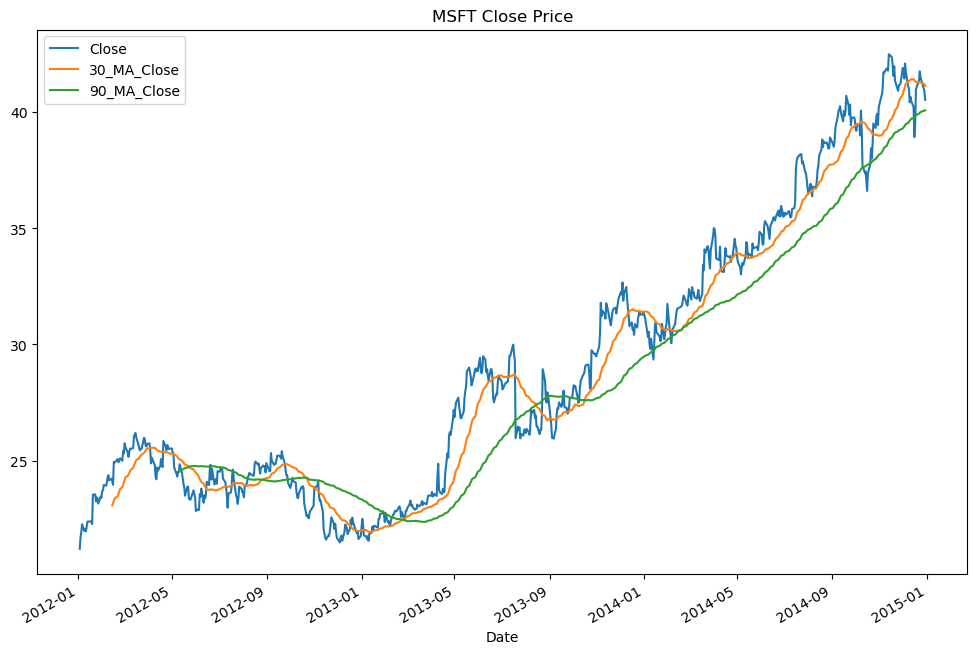

In [127]:
import datetime
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# Fetch the stock data for MSFT
ticker = 'MSFT'
msft_data = yf.download(ticker, start=start, end=end)

# Extract the adjusted closing prices
msft_close = msft_data['Adj Close']

# Calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()

# Compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})

# Plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12, 8)
plt.show()


## Comparision of average daily returns across stocks

[*********************100%%**********************]  2 of 2 completed


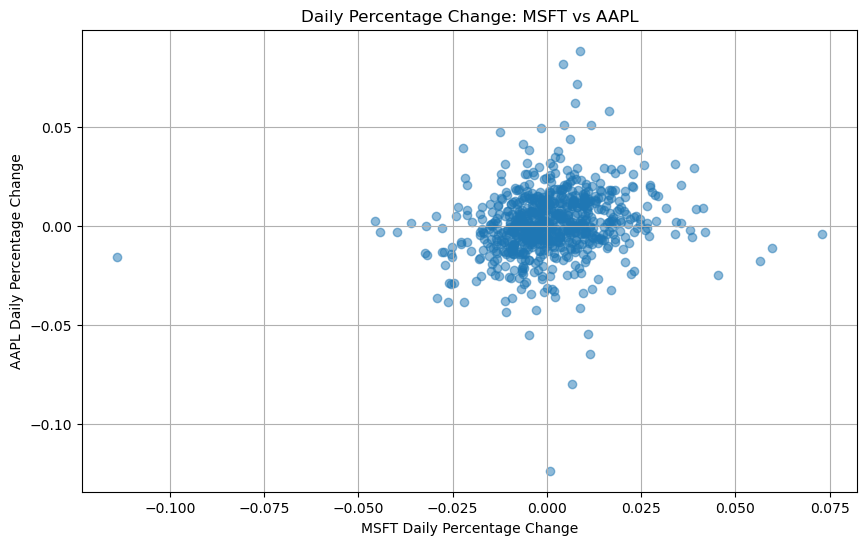

In [132]:
import datetime
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the date range
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# Fetch the stock data for MSFT and AAPL
tickers = ['MSFT', 'AAPL']
data = yf.download(tickers, start=start, end=end)['Adj Close']

# Calculate the daily percentage change
daily_pc = data.pct_change().dropna()

# Create a scatter plot of the daily percentage change
plt.figure(figsize=(10, 6))
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'], alpha=0.5)
plt.xlabel('MSFT Daily Percentage Change')
plt.ylabel('AAPL Daily Percentage Change')
plt.title('Daily Percentage Change: MSFT vs AAPL')
plt.grid(True)
plt.show()


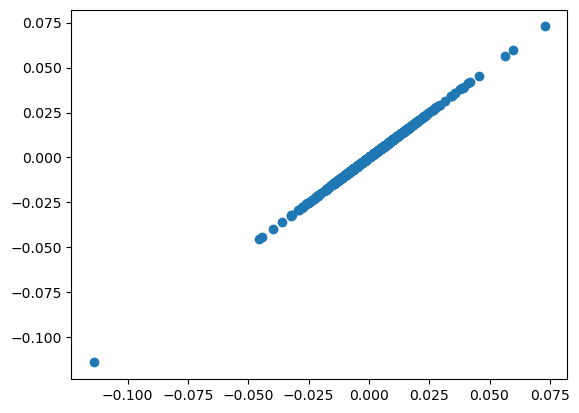

In [134]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

[*********************100%%**********************]  5 of 5 completed


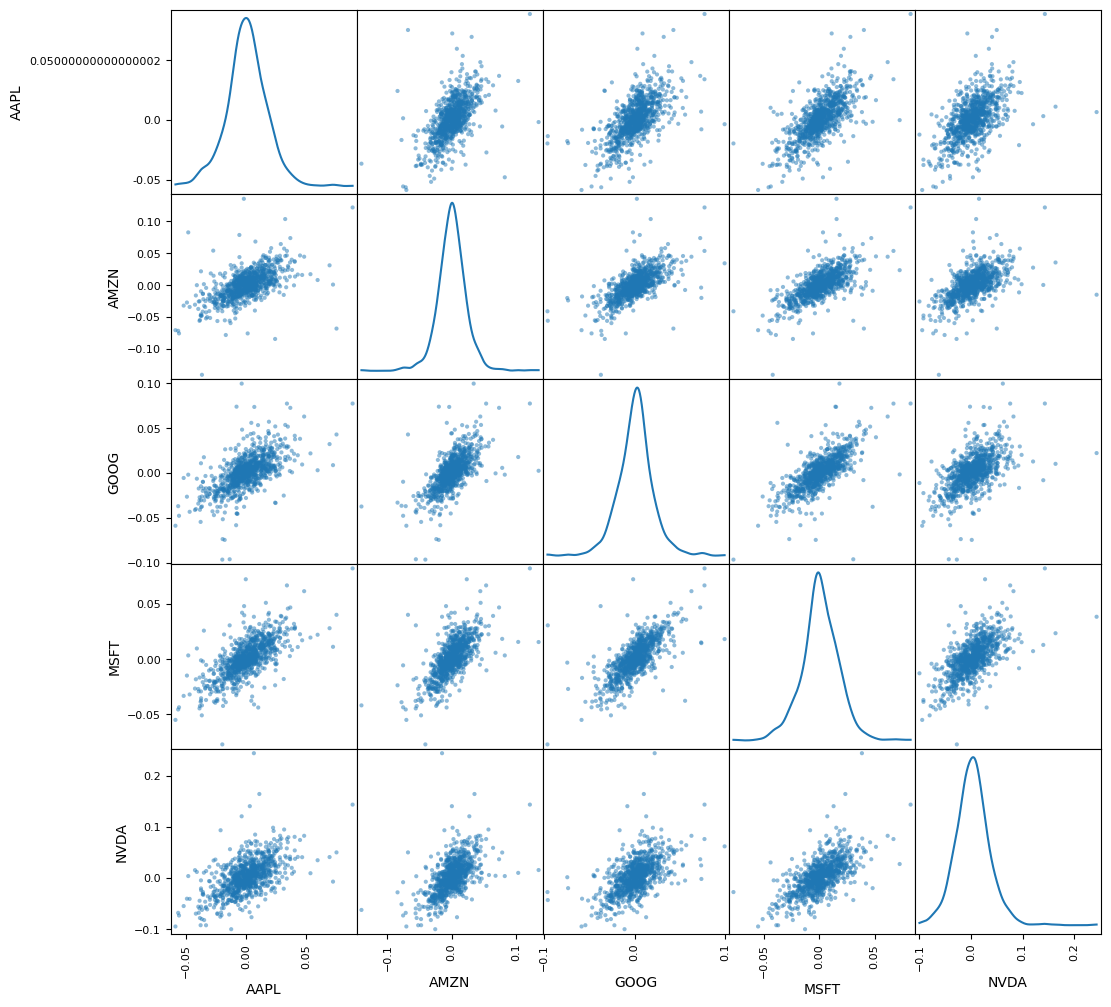

In [207]:
import datetime
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Define the date range
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2024, 7, 1)

# Fetch the stock data for multiple tickers
tickers = ['MSFT', 'AAPL', 'GOOG', 'AMZN','NVDA']
data = yf.download(tickers, start=start, end=end)['Adj Close']

# Calculate the daily percentage change
daily_pc = data.pct_change().dropna()

# Plot the scatter matrix
scatter_matrix(daily_pc, diagonal='kde', figsize=(12, 12))

plt.show()


## Correlation of stocks based upon daily percentage change of closing price

In [210]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker    AAPL    AMZN    GOOG    MSFT    NVDA
Ticker                                        
AAPL    1.0000  0.5739  0.6188  0.6895  0.5669
AMZN    0.5739  1.0000  0.6497  0.6686  0.5676
GOOG    0.6188  0.6497  1.0000  0.7093  0.5570
MSFT    0.6895  0.6686  0.7093  1.0000  0.6475
NVDA    0.5669  0.5676  0.5570  0.6475  1.0000

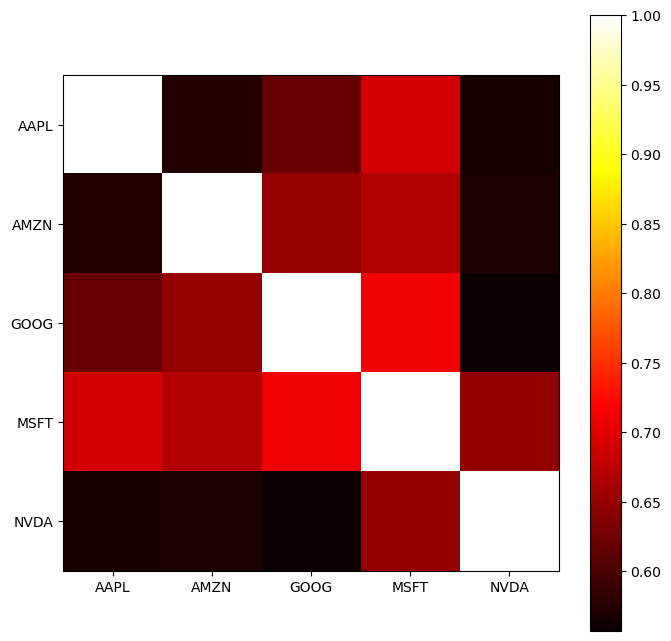

In [212]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

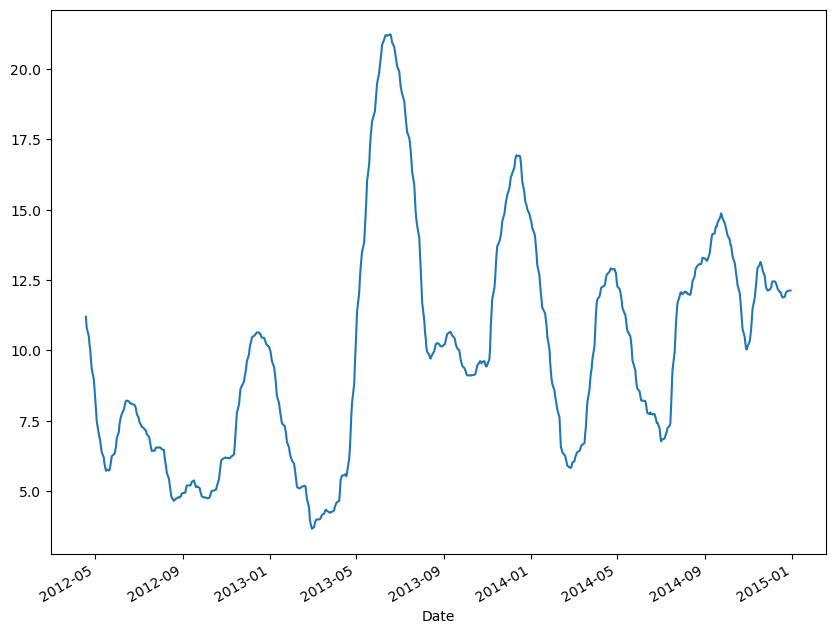

In [215]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol=0
vol = msft_close.rolling(75).std() * np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

# Determining risk relative to expected returns

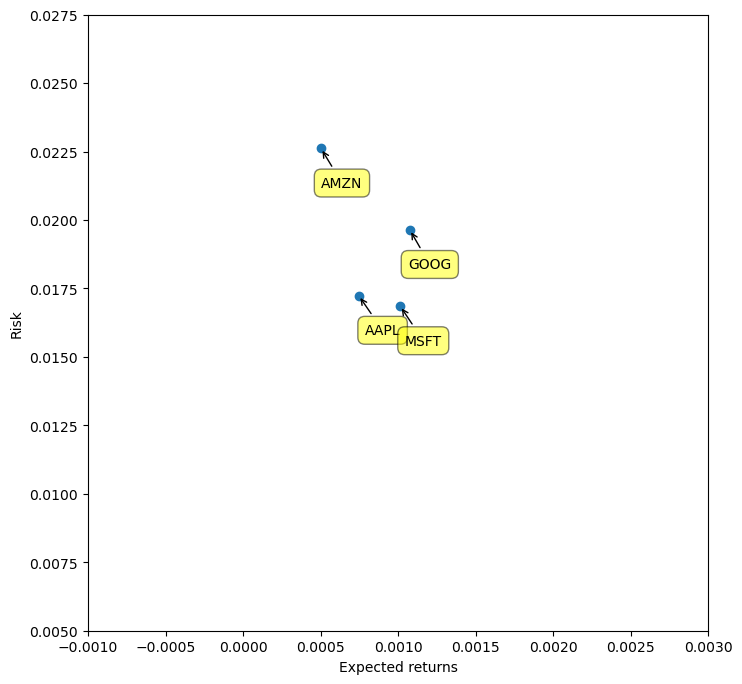

In [235]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)